# **Main implementation**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 01/10/2022*

*Last updated: 27/11/2022*

---

In [4]:
# Function that configures the storage
from fragments.functions.storage_configuration import configure_storage

# Function that transforms the dataset **for the modelling**
from fragments.functions.transform_model import transform_df_model

# Function that transforms the dataset **for the prediction**
from fragments.functions.transform_prediction import transform_df_predict

# Function that trains the model mlp
from fragments.functions.model_mlp import train_mlp

# Function that trains the model mlp
from fragments.functions.model_decision_tree import train_decision_tree

In [5]:
# Importing the necessary libraries
import pandas as pd
from joblib import load, dump

*THESE VARIABLES MUST BE GIVEN BY THE USER, PLEASE EDIT TO USE*

In [6]:
# Defining the file to use
dataset_path = 'C:\\Users\\myros\\Documents\\7mo_Semestre_Period2\\Reto\\TC3007C_AI\\datasets_prueba\\telecom_churn.csv'
original_name_dataset = 'WA_Fn-UseC_-Telco-Customer-Churn'
target_column_name = 'Churn'

### ***Storage configuration***

In [4]:
configure_storage(dataset_path, original_name_dataset)

---

### ***Data preparation***

In [5]:
transform_df_model(original_name_dataset, target_column_name)

---
### ***Model training and Evaluation***

*THIS VARIABLE MUST BE GIVEN BY THE USER, PLEASE EDIT TO USE*

In [2]:
# Define if the model is using SMOTE algorithm
smote = False

#### *MLP*

Printing the K-fold Cross Validation


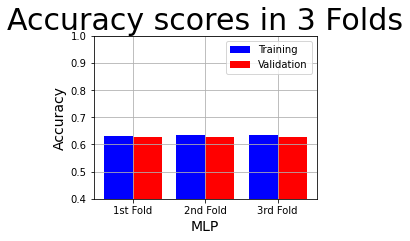

MSE Train: 0.37381781981085116
Accuracy Train: 0.6261821801891488
MSE Test: 0.38538538538538536
Accuracy Test: 0.6146146146146146


In [7]:
confussion_matrix, mlp_results = train_mlp(target_column_name, original_name_dataset, smote)

In [8]:
confussion_matrix

,0,1
0,526,70
1,315,88


#### *Decision Tree*

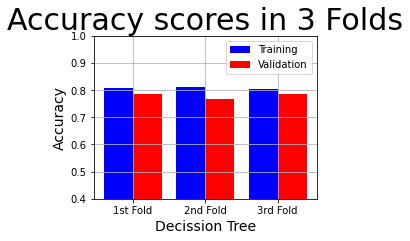

MSE Train: 0.1892111133644291
Accuracy Train: 0.8107888866355709
MSE Test: 0.22017045454545456
Accuracy Test: 0.7798295454545454


In [7]:
confussion_matrix, decision_tree_results = train_decision_tree(target_column_name, original_name_dataset, smote)

In [10]:
confussion_matrix

,0,1
0,567,79
1,272,81


---
### ***Making new predictions***

*THIS VARIABLES MUST BE GIVEN BY THE USER, PLEASE EDIT TO USE*

In [22]:
new_df = pd.read_csv(f'../data/telecom_churn_me/{original_name_dataset}_new.csv')

In [23]:
transform_df_predict(new_df, original_name_dataset)

In [24]:
# Loading the model|
model = load(f'./fragments/joblibs/{original_name_dataset}/model/classification-model.joblib')
model

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [25]:
df_to_predict = pd.read_csv('../data/telecom_churn_me/transformed_new.csv')

#Predicting y for X_val
y_pred_prob = model.predict_proba(df_to_predict)
y_pred = model.predict(df_to_predict)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,